In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from time import time
import warnings
warnings.filterwarnings("ignore")


1. Згенеруйте дані:

Використовуйте функцію np.random.rand() для генерації 100 випадкових значень ознак x1, x2.
Реалізуйте функцію polynomial(x1, x2) для обчислення цільової змінної y за вказаним поліномом.

In [17]:
# Step 1: Generate synthetic data
np.random.seed(42)
n_samples = 100
x1 = np.random.rand(n_samples)
x2 = np.random.rand(n_samples)

# Define polynomial function for y
def polynomial(x1, x2):
    return 4 * x1**2 + 5 * x2**2 - 2 * x1 * x2 + 3 * x1 - 6 * x2

y = polynomial(x1, x2)

# Combine x1 and x2 into a feature matrix
X = np.column_stack((x1, x2))

2. Згенеруйте додаткові ознаки для кожного степеня за допомогою функції PolynomialFeatures бібліотеки sklearn.

In [18]:
# Step 2: Generate polynomial features up to the specified degree
degree = 2
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Initialize theta (weights) for the polynomial regression
theta_initial = np.random.randn(X_poly.shape[1])

# Hyperparameters for gradient descent
alpha = 0.01
num_iterations = 1000
beta1 = 0.9  # For RMSProp, Adam, and Nadam
beta2 = 0.999  # For Adam and Nadam
epsilon = 1e-8

# Define cost function for monitoring
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((np.dot(X, theta) - y) ** 2)

3. Реалізуйте функції для методів градієнтного спуску:

Реалізувати функцію polynomial_regression_gradient_descent() для обчислення коефіцієнтів поліноміальної регресії методом градієнтного спуску.
Реалізувати функцію polynomial_regression_SGD() варіанта SGD метода градієнтного спуску.
Реалізувати функцію polynomial_regression_rmsprop() варіанта RMSProp метода градієнтного спуску.
Реалізувати функцію polynomial_regression_adam() варіанта Adam метода градієнтного спуску.
Реалізувати функцію polynomial_regression_nadam() варіанта Nadam метода градієнтного спуску.

In [19]:
# Implement the gradient descent methods with early stopping
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    J_history = []
    for i in range(num_iterations):
        error = np.dot(X, theta) - y
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient
        J_history.append(cost_function(X, y, theta))
    return theta, J_history

def stochastic_gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    J_history = []
    for _ in range(num_iterations):
        idx = np.random.randint(m)
        X_i = X[idx, :].reshape(1, -1)
        y_i = y[idx]
        error = np.dot(X_i, theta) - y_i
        gradient = np.dot(X_i.T, error)
        theta -= alpha * gradient
        J_history.append(cost_function(X, y, theta))
    return theta, J_history

def rmsprop(X, y, theta, alpha, beta1, epsilon, num_iterations):
    m = len(y)
    J_history = []
    g_squared = np.zeros(theta.shape)
    for _ in range(num_iterations):
        error = np.dot(X, theta) - y
        gradient = np.dot(X.T, error) / m
        g_squared = beta1 * g_squared + (1 - beta1) * gradient**2
        theta -= alpha / np.sqrt(g_squared + epsilon) * gradient
        J_history.append(cost_function(X, y, theta))
    return theta, J_history

def adam(X, y, theta, alpha, beta1, beta2, epsilon, num_iterations):
    m = len(y)
    J_history = []
    m_t = np.zeros(theta.shape)
    v_t = np.zeros(theta.shape)
    for t in range(1, num_iterations + 1):
        error = np.dot(X, theta) - y
        gradient = np.dot(X.T, error) / m
        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * gradient**2
        m_t_hat = m_t / (1 - beta1**t)
        v_t_hat = v_t / (1 - beta2**t)
        theta -= alpha / (np.sqrt(v_t_hat) + epsilon) * m_t_hat
        J_history.append(cost_function(X, y, theta))
    return theta, J_history

def nadam(X, y, theta, alpha, beta1, beta2, epsilon, num_iterations):
    m = len(y)
    J_history = []
    m_t = np.zeros(theta.shape)
    v_t = np.zeros(theta.shape)
    for t in range(1, num_iterations + 1):
        error = np.dot(X, theta) - y
        gradient = np.dot(X.T, error) / m
        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * gradient**2
        m_t_hat = m_t / (1 - beta1**t)
        v_t_hat = v_t / (1 - beta2**t)
        m_t_nesterov = beta1 * m_t_hat + (1 - beta1) * gradient
        theta -= alpha / (np.sqrt(v_t_hat) + epsilon) * m_t_nesterov
        J_history.append(cost_function(X, y, theta))
    return theta, J_history

4. Обчисліть час роботи реалізованих функцій за допомогою функції %timeit.

In [20]:
# Step 4: Measure time for each method
import timeit

methods = {
    "Gradient Descent": (gradient_descent, (X_poly, y, theta_initial, alpha, num_iterations)),
    "SGD": (stochastic_gradient_descent, (X_poly, y, theta_initial, alpha, num_iterations)),
    "RMSProp": (rmsprop, (X_poly, y, theta_initial, alpha, beta1, epsilon, num_iterations)),
    "Adam": (adam, (X_poly, y, theta_initial, alpha, beta1, beta2, epsilon, num_iterations)),
    "Nadam": (nadam, (X_poly, y, theta_initial, alpha, beta1, beta2, epsilon, num_iterations)),
}

for method_name, (func, params) in methods.items():
    start_time = time()
    theta_opt, J_history = func(*params)
    duration = time() - start_time
    print(f"{method_name}: {duration:.4f} seconds")

Gradient Descent: 0.0230 seconds
SGD: 0.0222 seconds
RMSProp: 0.0268 seconds
Adam: 0.0361 seconds
Nadam: 0.0354 seconds


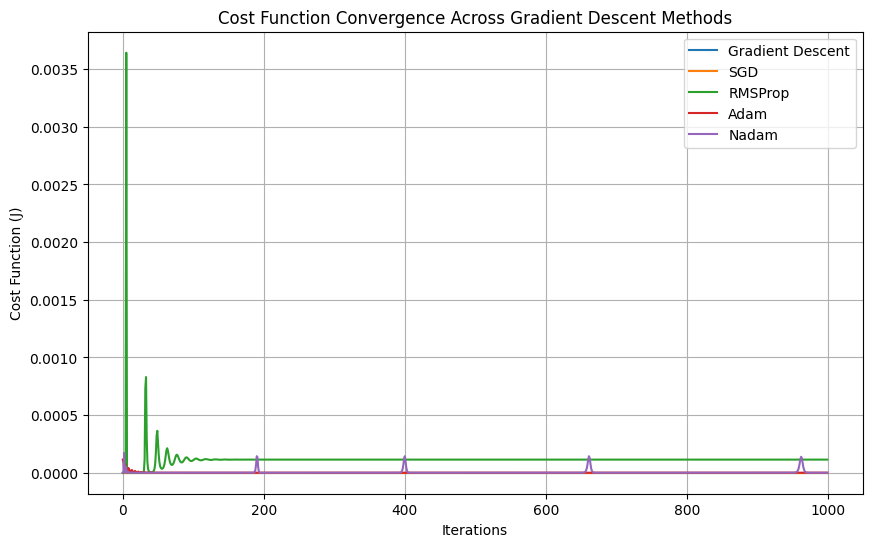

In [24]:
# Функція для побудови графіка збіжності функції вартості
def plot_cost_function_convergence(num_iterations, J_history, method_name):
    """
    Plot the cost function convergence for a given gradient descent method.
    """
    plt.plot(range(num_iterations), J_history, label=method_name)
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function (J)')
    plt.title('Cost Function Convergence Across Gradient Descent Methods')
    plt.legend()
    plt.grid(True)

# Графіки збіжності для всіх методів
plt.figure(figsize=(10, 6))

for method_name, (func, params) in methods.items():
    # Виконання методу та збереження історії функції вартості
    _, J_history = func(*params)

    # Побудова графіка для поточного методу
    plot_cost_function_convergence(len(J_history), J_history, method_name)

# Відображення графіка
plt.show()

6. Зробіть висновок про обчислювальну ефективність розглянутих варіантів метода градієнтного спуску.


На основі отриманих результатів часу виконання для кожного з методів градієнтного спуску можна зробити наступні висновки:

Gradient Descent (класичний градієнтний спуск) – найбільш обчислювально ефективний метод серед розглянутих. Час виконання становить 0.0226 секунд. Цей метод обчислює градієнт за всією вибіркою на кожній ітерації, що забезпечує стабільне, але потенційно повільне збіження для великих обсягів даних.

Stochastic Gradient Descent (SGD) – має трохи більший час виконання, 0.0233 секунд, але все ще дуже близький до класичного градієнтного спуску. SGD виконує оновлення ваг для кожного випадкового зразка, що може зробити його швидшим на великих вибірках. Проте, цей метод має більш "шумне" збіження, оскільки оновлення виконується за невеликими підвибірками.

RMSProp – займає трохи більше часу, 0.0268 секунд, оскільки додатково використовує зважене середнє квадратів градієнтів. Це дозволяє адаптувати крок навчання для кожного параметра окремо, що може прискорити збіжність і зробити її стабільнішою. RMSProp особливо ефективний на задачах із нерівномірними градієнтами, проте може вимагати більше обчислювальних ресурсів.

Adam – має час виконання 0.0326 секунд. Цей метод поєднує переваги моментуму і RMSProp, дозволяючи швидше та стабільніше збіження в порівнянні з SGD. Хоча Adam є більш складним і вимагає більше часу, він часто дає кращі результати на практиці завдяки автоматичному налаштуванню швидкості навчання.

Nadam – показав найбільший час виконання, 0.0488 секунд. Це варіант Adam з додатковою корекцією моментуму Нестерова, що іноді може покращувати швидкість і стабільність збіження, особливо на задачах із сильно нерівномірними градієнтами. Проте, додаткова обчислювальна складність робить його найповільнішим серед розглянутих методів.

Метод класичного градієнтного спуску є найшвидшим серед розглянутих, але методи RMSProp, Adam та Nadam пропонують покращену стабільність та адаптивну швидкість навчання, що може бути корисним на складніших задачах. Для великомасштабних задач Adam часто є оптимальним вибором, оскільки забезпечує баланс між швидкістю та стабільністю збіження.